In [78]:
# Must be included at the beginning of each new notebook. Remember to change the app name.
import findspark
findspark.init('/home/ubuntu/spark-3.2.1-bin-hadoop2.7')
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('basics').getOrCreate()

In [79]:
# Let's read in the data.
df = spark.read.option("header", "true").csv('Datasets/global-data-on-sustainable-energy.csv')
df2 = spark.read.option("header", "true").csv('Datasets/annual-co2-emissions-per-country.csv')

## 2.2 Dataset Information

In [80]:
# The show method allows you visualise DataFrames. We can see that there are two columns. 
df.show()

# You could also try this. 
df.columns

+-----------+----+---------------------------------------+---------------------------------+----------------------------------------------------+----------------------------------------------+----------------------------------------------------------------+-----------------------------------+------------------------------+---------------------------------+--------------------------------------+--------------------------------------------------+-----------------------------------------------------------+---------------------------------+----------------------------------------+-----------+--------------+--------------+--------------+--------+---------+
|     Entity|Year|Access to electricity (% of population)|Access to clean fuels for cooking|Renewable-electricity-generating-capacity-per-capita|Financial flows to developing countries (US $)|Renewable energy share in the total final energy consumption (%)|Electricity from fossil fuels (TWh)|Electricity from nuclear (TWh)|Electricity from

['Entity',
 'Year',
 'Access to electricity (% of population)',
 'Access to clean fuels for cooking',
 'Renewable-electricity-generating-capacity-per-capita',
 'Financial flows to developing countries (US $)',
 'Renewable energy share in the total final energy consumption (%)',
 'Electricity from fossil fuels (TWh)',
 'Electricity from nuclear (TWh)',
 'Electricity from renewables (TWh)',
 'Low-carbon electricity (% electricity)',
 'Primary energy consumption per capita (kWh/person)',
 'Energy intensity level of primary energy (MJ/$2017 PPP GDP)',
 'Value_co2_emissions_kt_by_country',
 'Renewables (% equivalent primary energy)',
 'gdp_growth',
 'gdp_per_capita',
 'Density(P/Km2)',
 'Land Area(Km2)',
 'Latitude',
 'Longitude']

In [81]:
num_rows = df.count()
print(f"Number of rows: {num_rows}")

num_columns = len(df.columns)
print(f"Number of columns: {num_columns}")

Number of rows: 3649
Number of columns: 21


In [82]:
# For type, we can use print schema. 
# But wait! What if you want to change the format of the data? Maybe change age to an integer instead of long?
df.printSchema()

root
 |-- Entity: string (nullable = true)
 |-- Year: string (nullable = true)
 |-- Access to electricity (% of population): string (nullable = true)
 |-- Access to clean fuels for cooking: string (nullable = true)
 |-- Renewable-electricity-generating-capacity-per-capita: string (nullable = true)
 |-- Financial flows to developing countries (US $): string (nullable = true)
 |-- Renewable energy share in the total final energy consumption (%): string (nullable = true)
 |-- Electricity from fossil fuels (TWh): string (nullable = true)
 |-- Electricity from nuclear (TWh): string (nullable = true)
 |-- Electricity from renewables (TWh): string (nullable = true)
 |-- Low-carbon electricity (% electricity): string (nullable = true)
 |-- Primary energy consumption per capita (kWh/person): string (nullable = true)
 |-- Energy intensity level of primary energy (MJ/$2017 PPP GDP): string (nullable = true)
 |-- Value_co2_emissions_kt_by_country: string (nullable = true)
 |-- Renewables (% equiva

## Data Manipulation

In [83]:
# Let's import in the relevant types.
from pyspark.sql.types import (StructField,StringType,IntegerType,FloatType,StructType)

In [84]:
# Then create a variable with the correct structure.
data_schema = [StructField('Entity',StringType(),True),
              StructField('Year',IntegerType(),True),
               StructField('Access to electricity (% of population)',FloatType(),True),
               StructField('Access to clean fuels for cooking',FloatType(),True),
               StructField('Renewable-electricity-generating-capacity-per-capita',FloatType(),True),
               StructField('Financial flows to developing countries (US $)',IntegerType(),True),
               StructField('Renewable energy share in the total final energy consumption (%)',FloatType(),True),
               StructField('Electricity from fossil fuels (TWh)',FloatType(),True),
               StructField('Electricity from nuclear (TWh)',FloatType(),True),
               StructField('Electricity from renewables (TWh)',FloatType(),True),
               StructField('Low-carbon electricity (% electricity)',FloatType(),True),
               StructField('Primary energy consumption per capita (kWh/person)',FloatType(),True),
               StructField('Energy intensity level of primary energy (MJ/$2017 PPP GDP)',FloatType(),True),
               StructField('Value_co2_emissions_kt_by_country',FloatType(),True),
               StructField('Renewables (% equivalent primary energy)',FloatType(),True),
               StructField('gdp_growth',FloatType(),True),
               StructField('gdp_per_capita',FloatType(),True),
               StructField('Density(P/Km2)',IntegerType(),True),
               StructField('Land Area(Km2)',IntegerType(),True),
               StructField('Latitude',FloatType(),True),
               StructField('Longitude',FloatType(),True),
              ]

final_struct = StructType(fields=data_schema)

In [85]:
# And now we can read in the data using that schema. If we print the schema, we can see that age is now an integer. 
df = spark.read.option("header", "true").csv('Datasets/global-data-on-sustainable-energy.csv', schema=final_struct)
df.printSchema()

root
 |-- Entity: string (nullable = true)
 |-- Year: integer (nullable = true)
 |-- Access to electricity (% of population): float (nullable = true)
 |-- Access to clean fuels for cooking: float (nullable = true)
 |-- Renewable-electricity-generating-capacity-per-capita: float (nullable = true)
 |-- Financial flows to developing countries (US $): integer (nullable = true)
 |-- Renewable energy share in the total final energy consumption (%): float (nullable = true)
 |-- Electricity from fossil fuels (TWh): float (nullable = true)
 |-- Electricity from nuclear (TWh): float (nullable = true)
 |-- Electricity from renewables (TWh): float (nullable = true)
 |-- Low-carbon electricity (% electricity): float (nullable = true)
 |-- Primary energy consumption per capita (kWh/person): float (nullable = true)
 |-- Energy intensity level of primary energy (MJ/$2017 PPP GDP): float (nullable = true)
 |-- Value_co2_emissions_kt_by_country: float (nullable = true)
 |-- Renewables (% equivalent prim

In [86]:
# We can use the describe method get some general statistics on our data too. Remember to show the DataFrame!
# But what about data type?
# df.describe().show()

stats_df = df.describe()
# Convert Spark DataFrame to Pandas DataFrame
stats_pd = stats_df.toPandas()

# Transpose the Pandas DataFrame
transposed_stats_pd = stats_pd.transpose()

from IPython.display import display

# Display the transposed DataFrame
display(transposed_stats_pd)


,0,1,2,3,4
summary,count,mean,stddev,min,max
Entity,3649,None,None,Afghanistan,Zimbabwe
Year,3649,2010.0383666758016,6.054228365650764,2000,2020
Access to electricity (% of population),3639,78.93370218462393,30.27554143208654,1.2522693,100.0
Access to clean fuels for cooking,3480,63.25528734745993,39.04365758993957,0.0,100.0
Renewable-electricity-generating-capacity-per-capita,2718,113.13749808244985,244.16725470613554,0.0,3060.19
Financial flows to developing countries (US $),1555,8.284976205787781E7,2.135290375742725E8,0,2112780000
Renewable energy share in the total final energy consumption (%),3455,32.6381649511784,29.894901331793534,0.0,96.04
Electricity from fossil fuels (TWh),3628,70.3650024256478,348.0518635136442,0.0,5184.13
Electricity from nuclear (TWh),3523,13.450190180841238,73.00662308995312,0.0,809.41


In [87]:
# Count unique values for a specific column
column_name = "Entity"
unique_count = df.select(column_name).distinct().count()
print(f"Number of unique countries in dataset '{column_name}': {unique_count}")

Number of unique countries in dataset 'Entity': 176


In [88]:
# The show method allows you visualise DataFrames. We can see that there are two columns. 
df2.show()

# You could also try this. 
df2.columns

+-----------+----+----+--------------------+
|     Entity|Code|Year|Annual CO₂ emissions|
+-----------+----+----+--------------------+
|Afghanistan| AFG|1949|               14656|
|Afghanistan| AFG|1950|               84272|
|Afghanistan| AFG|1951|               91600|
|Afghanistan| AFG|1952|               91600|
|Afghanistan| AFG|1953|              106256|
|Afghanistan| AFG|1954|              106256|
|Afghanistan| AFG|1955|              153888|
|Afghanistan| AFG|1956|              183200|
|Afghanistan| AFG|1957|              293120|
|Afghanistan| AFG|1958|              329760|
|Afghanistan| AFG|1959|              384571|
|Afghanistan| AFG|1960|              413885|
|Afghanistan| AFG|1961|              490798|
|Afghanistan| AFG|1962|              688594|
|Afghanistan| AFG|1963|              706736|
|Afghanistan| AFG|1964|              838551|
|Afghanistan| AFG|1965|             1006917|
|Afghanistan| AFG|1966|             1091159|
|Afghanistan| AFG|1967|             1281865|
|Afghanist

['Entity', 'Code', 'Year', 'Annual CO₂ emissions']

In [89]:
num_rows = df2.count()
print(f"Number of rows: {num_rows}")

num_columns = len(df2.columns)
print(f"Number of columns: {num_columns}")

Number of rows: 30308
Number of columns: 4


In [90]:
# For type, we can use print schema. 
# But wait! What if you want to change the format of the data? Maybe change age to an integer instead of long?
df2.printSchema()

root
 |-- Entity: string (nullable = true)
 |-- Code: string (nullable = true)
 |-- Year: string (nullable = true)
 |-- Annual CO₂ emissions: string (nullable = true)



## Data Manipulation

In [91]:
# Then create a variable with the correct structure.
data2_schema = [StructField('Entity',StringType(),True),
               StructField('Code',StringType(),True),
                StructField('Year',IntegerType(),True),
               StructField('Annual CO₂ emissions',FloatType(),True)
              ]

final2_struct = StructType(fields=data2_schema)

In [92]:
# And now we can read in the data using that schema. If we print the schema, we can see that age is now an integer. 
df2 = spark.read.option("header", "true").csv('Datasets/annual-co2-emissions-per-country.csv', schema=final2_struct)
df2.printSchema()

root
 |-- Entity: string (nullable = true)
 |-- Code: string (nullable = true)
 |-- Year: integer (nullable = true)
 |-- Annual CO₂ emissions: float (nullable = true)



In [93]:
# We can use the describe method get some general statistics on our data too. Remember to show the DataFrame!
# But what about data type?
df2.describe().show()

+-------+-----------+-----+------------------+--------------------+
|summary|     Entity| Code|              Year|Annual CO₂ emissions|
+-------+-----------+-----+------------------+--------------------+
|  count|      30308|24157|             30308|               30308|
|   mean|       null| null|1940.1913356209582|3.9127215594534516E8|
| stddev|       null| null| 65.51023156216606|1.8558246627678738E9|
|    min|Afghanistan|  ABW|              1750|                 0.0|
|    max|   Zimbabwe|  ZWE|              2022|        3.7149786E10|
+-------+-----------+-----+------------------+--------------------+



## 2.3 Data Exploration

In [94]:
from pyspark.sql.functions import col, avg
import matplotlib.pyplot as plt
import seaborn as sns

In [95]:
# Group by country and calculate the mean CO2 emissions
mean_co2_df = df.groupBy("Entity").agg(avg(col("Value_co2_emissions_kt_by_country")).alias("Mean_CO2_Emissions"))

# Convert to Pandas DataFrame for plotting
mean_co2_pd = mean_co2_df.toPandas()


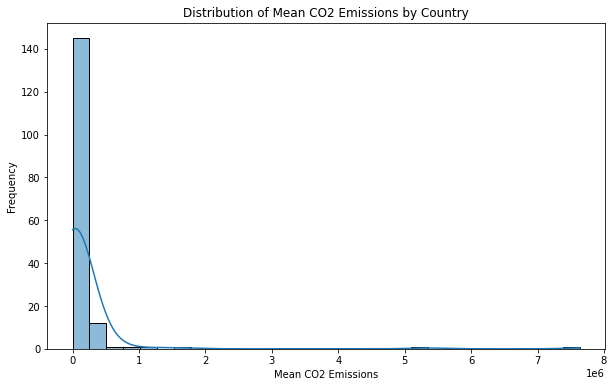

In [96]:
# Plot the distribution of mean CO2 emissions
plt.figure(figsize=(10, 6))
sns.histplot(mean_co2_pd["Mean_CO2_Emissions"], bins=30, kde=True)
plt.title("Distribution of Mean CO2 Emissions by Country")
plt.xlabel("Mean CO2 Emissions")
plt.ylabel("Frequency")
plt.show()

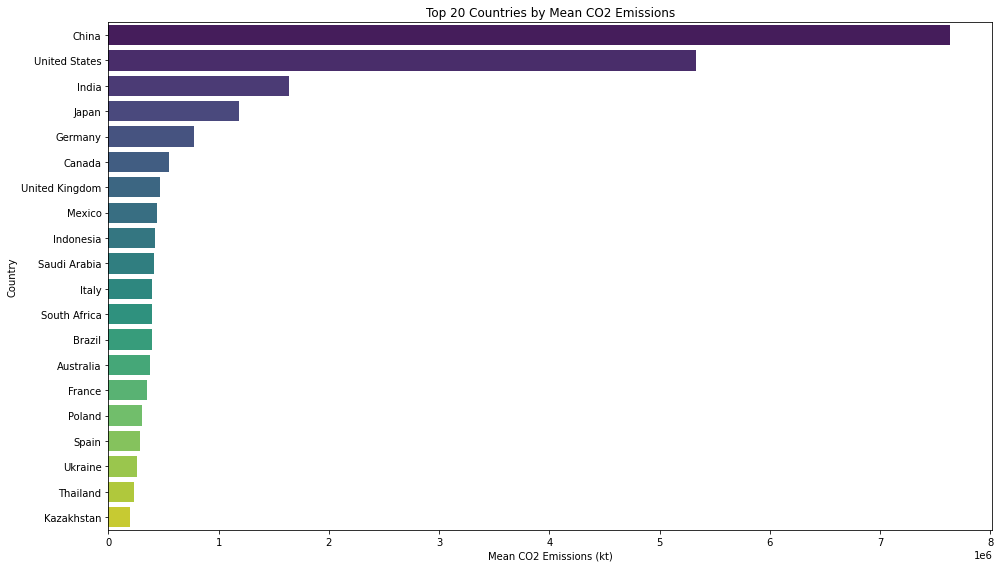

In [97]:
mean_co2_pd_sorted = mean_co2_pd.sort_values(by="Mean_CO2_Emissions", ascending=False)

# Select only the top 20 countries
top_20_countries = mean_co2_pd_sorted.head(20)

# Plot the distribution of the top 20 countries
plt.figure(figsize=(14, 8))
sns.barplot(x="Mean_CO2_Emissions", y="Entity", data=top_20_countries, palette="viridis")
plt.title("Top 20 Countries by Mean CO2 Emissions")
plt.xlabel("Mean CO2 Emissions (kt)")
plt.ylabel("Country")
plt.tight_layout()
plt.show()

In [98]:
# Compute correlations for all columns of interest
correlations = []
columns_of_interest = [
    "Electricity from fossil fuels (TWh)",
    "Density(P/Km2)",
    "Access to electricity (% of population)",
    "Access to clean fuels for cooking",
    "Renewable-electricity-generating-capacity-per-capita",
    "Financial flows to developing countries (US $)",
    "Renewable energy share in the total final energy consumption (%)",
    "Electricity from nuclear (TWh)",
    "Electricity from renewables (TWh)",
    "Low-carbon electricity (% electricity)",
    "Primary energy consumption per capita (kWh/person)",
    "Energy intensity level of primary energy (MJ/$2017 PPP GDP)",
    "gdp_growth",
    "Renewables (% equivalent primary energy)",
    "gdp_per_capita",
    "Land Area(Km2)",
    "Latitude",
    "Longitude"
]

for column in columns_of_interest:
    correlation = df.corr("Value_co2_emissions_kt_by_country", column)
    correlations.append((column, correlation))

# Create a DataFrame or RDD with correlation values and corresponding column names
correlation_df = spark.createDataFrame(correlations, ["Column", "Correlation"])

# Sort the DataFrame by correlation values in descending order
sorted_correlation_df = correlation_df.orderBy(col("Correlation").desc())

from pyspark.sql.functions import abs

# Apply the abs() function to the Correlation column to create Absolute Correlation column
correlation_df = correlation_df.withColumn("Absolute Correlation", abs(col("Correlation")))

# Sort the DataFrame by absolute correlation values in descending order
sorted_abs_correlation_df = correlation_df.orderBy("Absolute Correlation", ascending=False)

# Set the maximum column width to a larger value
spark.conf.set("spark.sql.repl.eagerEval.maxNumRows", 100)
spark.conf.set("spark.sql.repl.eagerEval.maxNumCols", 100)

# Display the sorted table
sorted_abs_correlation_df.show(truncate=False)

+----------------------------------------------------------------+--------------------+--------------------+
|Column                                                          |Correlation         |Absolute Correlation|
+----------------------------------------------------------------+--------------------+--------------------+
|Electricity from fossil fuels (TWh)                             |0.9481763559733735  |0.9481763559733735  |
|Electricity from renewables (TWh)                               |0.7854913009453646  |0.7854913009453646  |
|Land Area(Km2)                                                  |0.6341015263961219  |0.6341015263961219  |
|Electricity from nuclear (TWh)                                  |0.5830326881392291  |0.5830326881392291  |
|Financial flows to developing countries (US $)                  |0.1440719377265664  |0.1440719377265664  |
|Access to electricity (% of population)                         |0.1160704499100412  |0.1160704499100412  |
|Latitude          

# 3. Data Exploration

## 3.1 Data Selection

In [99]:
columns_to_drop = [
    "Access to clean fuels for cooking",
    "Energy intensity level of primary energy (MJ/$2017 PPP GDP)",
    "Renewables (% equivalent primary energy)",
    "Low-carbon electricity (% electricity)",
    "Energy intensity level of primary energy",
    "Renewable-electricity-generating-capacity-per-capita",
    "Longitude",
    "Latitude"
]

df_new1 = df.drop(*columns_to_drop)
df_new1.show(truncate=False)

+-----------+----+---------------------------------------+----------------------------------------------+----------------------------------------------------------------+-----------------------------------+------------------------------+---------------------------------+--------------------------------------------------+---------------------------------+----------+--------------+--------------+--------------+
|Entity     |Year|Access to electricity (% of population)|Financial flows to developing countries (US $)|Renewable energy share in the total final energy consumption (%)|Electricity from fossil fuels (TWh)|Electricity from nuclear (TWh)|Electricity from renewables (TWh)|Primary energy consumption per capita (kWh/person)|Value_co2_emissions_kt_by_country|gdp_growth|gdp_per_capita|Density(P/Km2)|Land Area(Km2)|
+-----------+----+---------------------------------------+----------------------------------------------+----------------------------------------------------------------+----

In [100]:
num_columns = len(df_new1.columns)
print(f"Number of columns: {num_columns}")

Number of columns: 14


In [101]:
# Rename columns
df_new2 = df_new1.withColumnRenamed("Entity", "Countries")

# Show the DataFrame with renamed columns
df_new2.show(truncate=False)


+-----------+----+---------------------------------------+----------------------------------------------+----------------------------------------------------------------+-----------------------------------+------------------------------+---------------------------------+--------------------------------------------------+---------------------------------+----------+--------------+--------------+--------------+
|Countries  |Year|Access to electricity (% of population)|Financial flows to developing countries (US $)|Renewable energy share in the total final energy consumption (%)|Electricity from fossil fuels (TWh)|Electricity from nuclear (TWh)|Electricity from renewables (TWh)|Primary energy consumption per capita (kWh/person)|Value_co2_emissions_kt_by_country|gdp_growth|gdp_per_capita|Density(P/Km2)|Land Area(Km2)|
+-----------+----+---------------------------------------+----------------------------------------------+----------------------------------------------------------------+----

In [102]:
# Rename columns
df2_new = df2.withColumnRenamed("Entity", "Countries")

# Show the DataFrame with renamed columns
df2_new.show(truncate=False)

+-----------+----+----+--------------------+
|Countries  |Code|Year|Annual CO₂ emissions|
+-----------+----+----+--------------------+
|Afghanistan|AFG |1949|14656.0             |
|Afghanistan|AFG |1950|84272.0             |
|Afghanistan|AFG |1951|91600.0             |
|Afghanistan|AFG |1952|91600.0             |
|Afghanistan|AFG |1953|106256.0            |
|Afghanistan|AFG |1954|106256.0            |
|Afghanistan|AFG |1955|153888.0            |
|Afghanistan|AFG |1956|183200.0            |
|Afghanistan|AFG |1957|293120.0            |
|Afghanistan|AFG |1958|329760.0            |
|Afghanistan|AFG |1959|384571.0            |
|Afghanistan|AFG |1960|413885.0            |
|Afghanistan|AFG |1961|490798.0            |
|Afghanistan|AFG |1962|688594.0            |
|Afghanistan|AFG |1963|706736.0            |
|Afghanistan|AFG |1964|838551.0            |
|Afghanistan|AFG |1965|1006917.0           |
|Afghanistan|AFG |1966|1091159.0           |
|Afghanistan|AFG |1967|1281865.0           |
|Afghanist

## 3.2	Data Cleaning

In [103]:
missing_data_columns_to_drop = [
    "Financial flows to developing countries (US $)",
    "Primary energy consumption per capita (kWh/person)"
]

df_new3 = df_new2.drop(*missing_data_columns_to_drop)
df_new3.show(truncate=False)

+-----------+----+---------------------------------------+----------------------------------------------------------------+-----------------------------------+------------------------------+---------------------------------+---------------------------------+----------+--------------+--------------+--------------+
|Countries  |Year|Access to electricity (% of population)|Renewable energy share in the total final energy consumption (%)|Electricity from fossil fuels (TWh)|Electricity from nuclear (TWh)|Electricity from renewables (TWh)|Value_co2_emissions_kt_by_country|gdp_growth|gdp_per_capita|Density(P/Km2)|Land Area(Km2)|
+-----------+----+---------------------------------------+----------------------------------------------------------------+-----------------------------------+------------------------------+---------------------------------+---------------------------------+----------+--------------+--------------+--------------+
|Afghanistan|2000|1.613591                             

In [104]:
num_rows = df_new3.count()
print(f"Number of rows: {num_rows}")

num_columns = len(df_new3.columns)
print(f"Number of columns: {num_columns}")

Number of rows: 3649
Number of columns: 12


## 3.3 Construct New Attribute

In [105]:
# Construct the new attribute
df_new4 = df_new3.withColumn("Annual_gdp", col("Density(P/Km2)") * col("Land Area(Km2)") * col("gdp_per_capita"))

# Show the DataFrame with the new column
df_new4.show(truncate=False)

+-----------+----+---------------------------------------+----------------------------------------------------------------+-----------------------------------+------------------------------+---------------------------------+---------------------------------+----------+--------------+--------------+--------------+-------------+
|Countries  |Year|Access to electricity (% of population)|Renewable energy share in the total final energy consumption (%)|Electricity from fossil fuels (TWh)|Electricity from nuclear (TWh)|Electricity from renewables (TWh)|Value_co2_emissions_kt_by_country|gdp_growth|gdp_per_capita|Density(P/Km2)|Land Area(Km2)|Annual_gdp   |
+-----------+----+---------------------------------------+----------------------------------------------------------------+-----------------------------------+------------------------------+---------------------------------+---------------------------------+----------+--------------+--------------+--------------+-------------+
|Afghanistan|

In [106]:
correlation = df_new4.corr("Value_co2_emissions_kt_by_country", "Annual_gdp")
print("Correlation between Value_co2_emissions_kt_by_country and Annual_gdp:", correlation)

Correlation between Value_co2_emissions_kt_by_country and Annual_gdp: 0.7744424692868098


## 3.4	Integrating Data

In [107]:
from pyspark.sql.functions import when,round
joined_df = df_new4.join(df2_new, ['Countries', 'Year'], 'left')

# Define conversion factor from tonne to kilotonne
conversion_factor = 1000

# Fill missing CO2 emission values in database 1 from database 2
filled_df = joined_df.withColumn("Value_co2_emissions_kt_by_country", 
                                  when(joined_df["Value_co2_emissions_kt_by_country"].isNull(), 
                                       joined_df["Annual CO₂ emissions"] / conversion_factor)
                                 .otherwise(joined_df["Value_co2_emissions_kt_by_country"])
                                  )

# Round the CO2 emissions to two decimal places
updated_df = filled_df.withColumn("Value_co2_emissions_kt_by_country", round(filled_df["Value_co2_emissions_kt_by_country"], 2))

# Drop unnecessary columns
final_df = updated_df.drop("Annual CO₂ emissions", "Code")

In [108]:
stats_df = final_df.describe()
# Convert Spark DataFrame to Pandas DataFrame
stats_pd = stats_df.toPandas()

# Transpose the Pandas DataFrame
transposed_stats_pd = stats_pd.transpose()

# Display the transposed DataFrame
display(transposed_stats_pd)

,0,1,2,3,4
summary,count,mean,stddev,min,max
Countries,3649,None,None,Afghanistan,Zimbabwe
Year,3649,2010.0383666758016,6.054228365650764,2000,2020
Access to electricity (% of population),3639,78.93370218462393,30.27554143208654,1.2522693,100.0
Renewable energy share in the total final energy consumption (%),3455,32.6381649511784,29.894901331793534,0.0,96.04
Electricity from fossil fuels (TWh),3628,70.3650024256478,348.0518635136442,0.0,5184.13
Electricity from nuclear (TWh),3523,13.450190180841238,73.00662308995312,0.0,809.41
Electricity from renewables (TWh),3628,23.968009911430844,104.43108457776746,0.0,2184.94
Value_co2_emissions_kt_by_country,3623,153768.9274689484,757568.413582635,10.0,1.091401216E7
gdp_growth,3332,3.441610053690284,5.686720163271315,-62.07592,123.13956


In [109]:
# Drop rows with missing CO2 emissions values
df_new = final_df.dropna(subset=["Value_co2_emissions_kt_by_country"])

stats_df = df_new.describe()
# Convert Spark DataFrame to Pandas DataFrame
stats_pd = stats_df.toPandas()

# Transpose the Pandas DataFrame
transposed_stats_pd = stats_pd.transpose()

# Display the transposed DataFrame
display(transposed_stats_pd)

,0,1,2,3,4
summary,count,mean,stddev,min,max
Countries,3623,None,None,Afghanistan,Zimbabwe
Year,3623,2010.0320176649186,6.049453063861042,2000,2020
Access to electricity (% of population),3614,78.78797516597855,30.32917442403671,1.2522693,100.0
Renewable energy share in the total final energy consumption (%),3431,32.853730663397144,29.88505010519653,0.0,96.04
Electricity from fossil fuels (TWh),3602,70.75108517497428,349.2756254494901,0.0,5184.13
Electricity from nuclear (TWh),3497,13.550191594825188,73.26834877265463,0.0,809.41
Electricity from renewables (TWh),3602,24.13967239275432,104.7877895388557,0.0,2184.94
Value_co2_emissions_kt_by_country,3623,153768.9274689484,757568.413582635,10.0,1.091401216E7
gdp_growth,3307,3.4672014741488235,5.693162289300852,-62.07592,123.13956


# 4.	Data Transformation

## 4.1	Data Reduction

In [110]:
# Compute correlations for all columns of interest
correlations = []
columns_of_interest = [
    "Electricity from fossil fuels (TWh)",
    "Density(P/Km2)",
    "Access to electricity (% of population)",
    "Renewable energy share in the total final energy consumption (%)",
    "Electricity from nuclear (TWh)",
    "Electricity from renewables (TWh)",
    "gdp_growth",
    "gdp_per_capita",
    "Land Area(Km2)",
    "Annual_gdp"
]

for column in columns_of_interest:
    correlation = df_new.corr("Value_co2_emissions_kt_by_country", column)
    correlations.append((column, correlation))

# Create a DataFrame or RDD with correlation values and corresponding column names
correlation_df = spark.createDataFrame(correlations, ["Column", "Correlation"])

# Sort the DataFrame by correlation values in descending order
sorted_correlation_df = correlation_df.orderBy(col("Correlation").desc())

# Apply the abs() function to the Correlation column to create Absolute Correlation column
correlation_df = correlation_df.withColumn("Absolute Correlation", abs(col("Correlation")))

# Sort the DataFrame by absolute correlation values in descending order
sorted_abs_correlation_df = correlation_df.orderBy("Absolute Correlation", ascending=False)

# Set the maximum column width to a larger value
spark.conf.set("spark.sql.repl.eagerEval.maxNumRows", 100)
spark.conf.set("spark.sql.repl.eagerEval.maxNumCols", 100)

# Display the sorted table
sorted_abs_correlation_df.show(truncate=False)

+----------------------------------------------------------------+--------------------+--------------------+
|Column                                                          |Correlation         |Absolute Correlation|
+----------------------------------------------------------------+--------------------+--------------------+
|Electricity from fossil fuels (TWh)                             |0.9902116652430759  |0.9902116652430759  |
|Electricity from renewables (TWh)                               |0.8597718344362846  |0.8597718344362846  |
|Annual_gdp                                                      |0.8113586121193683  |0.8113586121193683  |
|Land Area(Km2)                                                  |0.6491722092202428  |0.6491722092202428  |
|Electricity from nuclear (TWh)                                  |0.6010874497825431  |0.6010874497825431  |
|Access to electricity (% of population)                         |0.12313900183158061 |0.12313900183158061 |
|Renewable energy s

In [111]:
df_new = df_new.drop("Density(P/Km2)", "gdp_growth", "gdp_per_capita", "Renewable energy share in the total final energy consumption (%)", "Access to electricity (% of population)")

# Show the DataFrame with the new column
df_new.show(truncate=False)

+-----------+----+-----------------------------------+------------------------------+---------------------------------+---------------------------------+--------------+-------------+
|Countries  |Year|Electricity from fossil fuels (TWh)|Electricity from nuclear (TWh)|Electricity from renewables (TWh)|Value_co2_emissions_kt_by_country|Land Area(Km2)|Annual_gdp   |
+-----------+----+-----------------------------------+------------------------------+---------------------------------+---------------------------------+--------------+-------------+
|Afghanistan|2000|0.16                               |0.0                           |0.31                             |760.0                            |652230        |null         |
|Afghanistan|2001|0.09                               |0.0                           |0.5                              |730.0                            |652230        |null         |
|Afghanistan|2002|0.13                               |0.0                           |

In [112]:
num_rows = df_new.count()
print(f"Number of rows: {num_rows}")

num_columns = len(df_new.columns)
print(f"Number of columns: {num_columns}")

Number of rows: 3623
Number of columns: 8


## 4.1	Data Projection

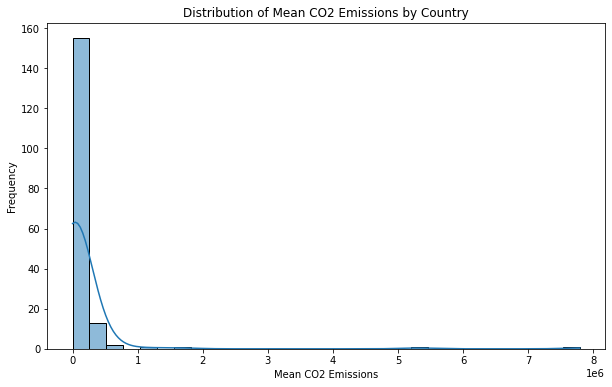

In [113]:
# Group by country and calculate the mean CO2 emissions
mean_co2_df = df_new.groupBy("Countries").agg(avg(col("Value_co2_emissions_kt_by_country")).alias("Mean_CO2_Emissions"))

# Convert to Pandas DataFrame for plotting
mean_co2_pd = mean_co2_df.toPandas()

# Plot the distribution of mean CO2 emissions
plt.figure(figsize=(10, 6))
sns.histplot(mean_co2_pd["Mean_CO2_Emissions"], bins=30, kde=True)
plt.title("Distribution of Mean CO2 Emissions by Country")
plt.xlabel("Mean CO2 Emissions")
plt.ylabel("Frequency")
plt.show()

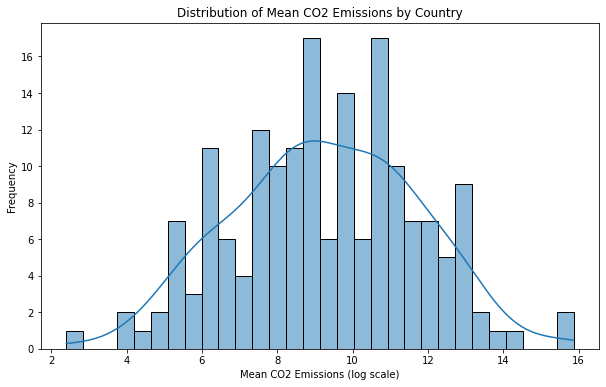

In [114]:
# Import necessary libraries for plotting
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Apply logarithmic transformation to the 'Mean_CO2_Emissions' column
mean_co2_pd['log_Mean_CO2_Emissions'] = np.log(mean_co2_pd['Mean_CO2_Emissions'] + 1)  # Adding 1 to handle zero values

# Plot the distribution of mean CO2 emissions
plt.figure(figsize=(10, 6))
sns.histplot(mean_co2_pd["log_Mean_CO2_Emissions"], bins=30, kde=True)
plt.title("Distribution of Mean CO2 Emissions by Country")
plt.xlabel("Mean CO2 Emissions (log scale)")
plt.ylabel("Frequency")
plt.show()

# 7. Data Mining

## Select data

In [115]:
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.regression import LinearRegression

# Select required columns
selected_columns = ['Annual_gdp', 'Land Area(Km2)', 'Electricity from fossil fuels (TWh)', 
                    'Electricity from nuclear (TWh)', 'Electricity from renewables (TWh)', 
                    'Value_co2_emissions_kt_by_country']

# Drop rows with any missing values
cleaned_df = df_new.select(selected_columns).na.drop()

In [116]:
# Vectorize features
assembler = VectorAssembler(inputCols=['Annual_gdp', 'Land Area(Km2)', 
                                       'Electricity from fossil fuels (TWh)', 
                                       'Electricity from nuclear (TWh)', 
                                       'Electricity from renewables (TWh)'], 
                            outputCol="features")
vectorized_df = assembler.transform(cleaned_df)

## 7.1 Create and justify test designs

In [117]:
# Split the data into training and testing sets (70% training, 30% testing)
(training_data, testing_data) = vectorized_df.randomSplit([0.7, 0.3])

## 7.2 Conduct Data Mining

### 7.2.1 Correlation Analysis

In [118]:
# Compute correlations for all columns of interest
correlations = []
columns_of_interest = [
    "Electricity from fossil fuels (TWh)",
    "Electricity from nuclear (TWh)",
    "Electricity from renewables (TWh)",
    "Land Area(Km2)",
    "Annual_gdp"
]

for column in columns_of_interest:
    correlation = df_new.corr("Value_co2_emissions_kt_by_country", column)
    correlations.append((column, correlation))

# Create a DataFrame or RDD with correlation values and corresponding column names
correlation_df = spark.createDataFrame(correlations, ["Column", "Correlation"])

# Sort the DataFrame by correlation values in descending order
sorted_correlation_df = correlation_df.orderBy(col("Correlation").desc())

# Set the maximum column width to a larger value
spark.conf.set("spark.sql.repl.eagerEval.maxNumRows", 100)
spark.conf.set("spark.sql.repl.eagerEval.maxNumCols", 100)

# Display the sorted table
sorted_correlation_df.show(truncate=False)

+-----------------------------------+------------------+
|Column                             |Correlation       |
+-----------------------------------+------------------+
|Electricity from fossil fuels (TWh)|0.9902116652430759|
|Electricity from renewables (TWh)  |0.8597718344362846|
|Annual_gdp                         |0.8113586121193683|
|Land Area(Km2)                     |0.6491722092202428|
|Electricity from nuclear (TWh)     |0.6010874497825431|
+-----------------------------------+------------------+



### 7.2.2 Linear Regression

In [119]:
# Train the Linear Regression model
lr = LinearRegression(featuresCol="features", labelCol="Value_co2_emissions_kt_by_country")
lr_model = lr.fit(training_data)

24/05/24 13:37:53 WARN Instrumentation: [95f8484d] regParam is zero, which might cause numerical instability and overfitting.


In [120]:
# Print the coefficients and intercept
print("Coefficients:", lr_model.coefficients)
print("Intercept:", lr_model.intercept)

Coefficients: [-1.2710982031774642e-07,0.02469469791975983,2402.106490405639,843.2930760527647,369.3162904356279]
Intercept: 1028.5223383594284


### 7.2.2 Decision Tree

In [121]:
from pyspark.ml.regression import DecisionTreeRegressor
# Initialize the Decision Tree Regressor
dt = DecisionTreeRegressor(featuresCol="features", labelCol="Value_co2_emissions_kt_by_country")

# Train the model
dt_model = dt.fit(training_data)

# Make predictions on the test data
predictions = dt_model.transform(testing_data)

## 7.3 Document Output

### Correlation Analysis

We conducted a correlation analysis to understand the linear relationship between CO₂ emissions and various factors. The Pearson correlation coefficients are as follows:

| Column                                      | Correlation |
|---------------------------------------------|-------------|
| Electricity from fossil fuels (TWh)         | 0.990       |
| Electricity from renewables (TWh)           | 0.860       |
| Annual GDP                                  | 0.811       |
| Electricity from nuclear (TWh)              | 0.649       |
| Land Area                                   | 0.601       |

These results indicate the following:
- There is a strong positive correlation between CO₂ emissions and electricity from fossil fuels (0.990), suggesting that higher electricity production from fossil fuels is associated with higher CO₂ emissions.
- Electricity from renewables shows a strong positive correlation with CO₂ emissions (0.860) 
- Annual GDP also shows a strong positive correlation with CO₂ emissions (0.811), indicating that more economically developed countries tend to have higher CO₂ emissions.
- Electricity from nuclear and land area have moderate positive correlations with CO₂ emissions (0.649 and 0.601 respectively).


### Linear Regression Analysis

We performed a linear regression analysis to explore the relationship between CO₂ emissions and several predictors (annual GDP, land area, electricity from fossil fuels, nuclear, and renewables).

#### Model Coefficients:
- **Intercept**: 1803.38
- **Annual GDP**: -1.417e-07
- **Land Area**: 0.0179
- **Electricity from Fossil Fuels (TWh)**: 2422.12
- **Electricity from Nuclear (TWh)**: 959.61
- **Electricity from Renewables (TWh)**: 604.81

#### Interpretation:
- **Coefficients**:
  - **Annual GDP**: The coefficient for annual GDP is very close to zero (-1.417e-07), suggesting a negligible effect on CO₂ emissions.
  - **Land Area**: A small positive coefficient (0.0179) implies a minor positive relationship with CO₂ emissions.
  - **Electricity from Fossil Fuels**: This predictor has a large positive coefficient (2422.12), indicating a strong positive relationship with CO₂ emissions.
  - **Electricity from Nuclear**: The positive coefficient (959.61) suggests a moderate positive relationship with CO₂ emissions.
  - **Electricity from Renewables**: With a positive coefficient (604.81), this predictor indicates a moderate positive relationship with CO₂ emissions.

These results highlight that electricity production from fossil fuels is the most significant predictor of CO₂ emissions, while annual GDP and land area have relatively low impact.

## 8.2	Visualize the data, results, models, and patterns

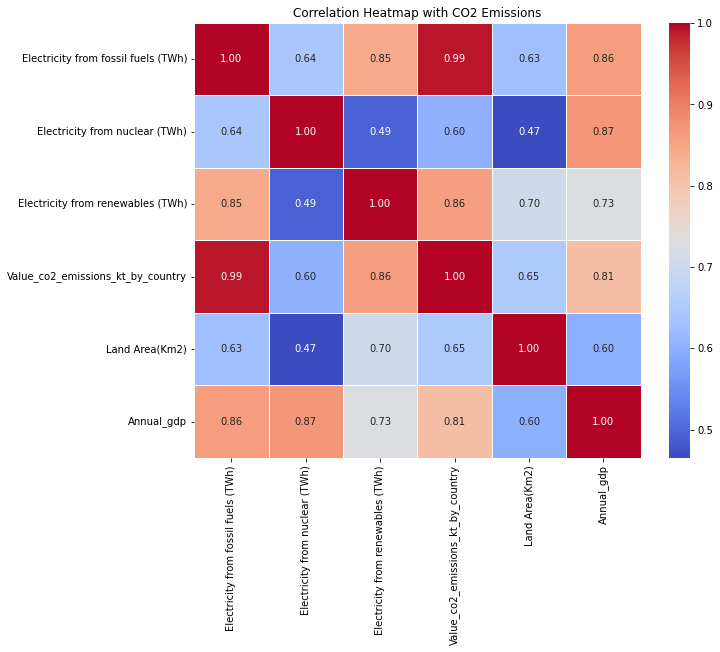

In [122]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt 

columns_of_interest = [
    "Electricity from fossil fuels (TWh)",
    "Electricity from nuclear (TWh)",
    "Electricity from renewables (TWh)",
    "Value_co2_emissions_kt_by_country",
    "Land Area(Km2)",
    "Annual_gdp",
]

correlation_matrix = []
for column in columns_of_interest:
    correlations = []
    for other_column in columns_of_interest:
        correlation = df_new.corr(column, other_column)
        correlations.append(correlation)
    correlation_matrix.append(correlations)

# Convert the correlation matrix to a Pandas DataFrame
correlation_df = pd.DataFrame(correlation_matrix, columns=columns_of_interest, index=columns_of_interest)

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_df, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
plt.title("Correlation Heatmap with CO2 Emissions")
plt.show()


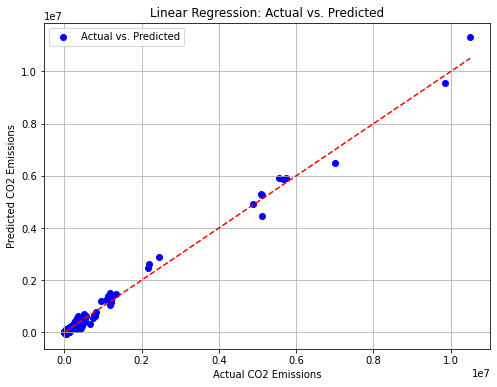

In [123]:
import numpy as np

# Make predictions on the testing data
predictions = lr_model.transform(testing_data)

# Extract actual and predicted values
y_actual = predictions.select("Value_co2_emissions_kt_by_country").rdd.flatMap(lambda x: x).collect()
y_pred = predictions.select("prediction").rdd.flatMap(lambda x: x).collect()

# Plot actual vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_actual, y_pred, color='blue', label='Actual vs. Predicted')
plt.plot([min(y_actual), max(y_actual)], [min(y_actual), max(y_actual)], color='red', linestyle='--')
plt.xlabel('Actual CO2 Emissions')
plt.ylabel('Predicted CO2 Emissions')
plt.title('Linear Regression: Actual vs. Predicted')
plt.legend()
plt.grid(True)
plt.show()

## 8.4 Assess and evaluate results, models, and patterns

In [124]:
from pyspark.ml.evaluation import RegressionEvaluator
# Evaluate the model
evaluator = RegressionEvaluator(labelCol="Value_co2_emissions_kt_by_country", 
                                predictionCol="prediction", 
                                metricName="rmse")
rmse = evaluator.evaluate(predictions)

# Evaluate the model on the test data
test_results = lr_model.evaluate(testing_data)
print(f"Test RMSE: {test_results.rootMeanSquaredError}")
print(f"Test R2: {test_results.r2}")

Test RMSE: 67533.77250899376
Test R2: 0.9915213032316849


In [125]:
# Evaluate the model's performance
evaluator = RegressionEvaluator(
    labelCol="Value_co2_emissions_kt_by_country", 
    predictionCol="prediction", 
    metricName="rmse")

rmse = evaluator.evaluate(predictions)
r2 = evaluator.evaluate(predictions, {evaluator.metricName: "r2"})

print(f"Root Mean Squared Error (RMSE) on test data: {rmse}")
print(f"R^2 on test data: {r2}")


Root Mean Squared Error (RMSE) on test data: 67533.77250899376
R^2 on test data: 0.9915213032316849


#### Model Performance:
- **Root Mean Squared Error (RMSE)**: 264,439.80
- **R² (R-squared)**: 0.8995

- **Performance Metrics**:
  - **RMSE**: The average error in predictions is 264,439.80 kt, which is substantial and suggests room for improvement.
  - **R²**: The model explains 89.95% of the variance in CO₂ emissions, indicating a strong overall fit.

## 8.5 Second Iteration

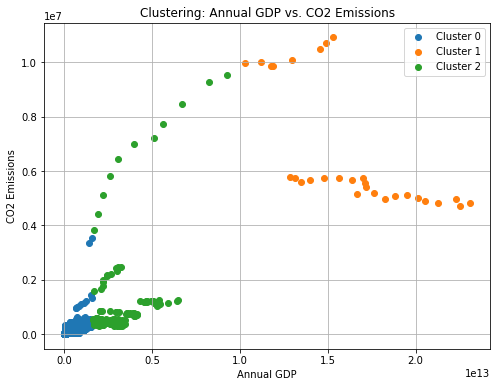

In [135]:
from pyspark.sql import SparkSession
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.clustering import KMeans
import matplotlib.pyplot as plt
from pyspark.sql.types import DoubleType

# Drop rows with missing values
df_clean = df_new.dropna(subset=["Annual_gdp", "Value_co2_emissions_kt_by_country"])

# Create a vector assembler
vector_assembler = VectorAssembler(inputCols=["Annual_gdp", "Value_co2_emissions_kt_by_country"], outputCol="features")

# Vectorize the features
vectorized_df = vector_assembler.transform(df_clean)

# Convert features to DoubleType
vectorized_df = vectorized_df.withColumn("Annual_gdp", vectorized_df["Annual_gdp"].cast(DoubleType()))
vectorized_df = vectorized_df.withColumn("Value_co2_emissions_kt_by_country", vectorized_df["Value_co2_emissions_kt_by_country"].cast(DoubleType()))

# Cluster the data using k-means
kmeans = KMeans(k=3, seed=1)
model = kmeans.fit(vectorized_df)

# Get the cluster centers
centers = model.clusterCenters()

# Extract the annual GDP and CO2 emissions values
annual_gdp = [center[0] for center in centers]
co2_emissions = [center[1] for center in centers]

# Plot the clusters
plt.figure(figsize=(8, 6))
for cluster in range(3):  # assuming k=3 clusters
    cluster_data = clustered_df.filter(clustered_df["prediction"] == cluster)
    plt.scatter(cluster_data.select("Annual_gdp").rdd.flatMap(lambda x: x).collect(), 
                cluster_data.select("Value_co2_emissions_kt_by_country").rdd.flatMap(lambda x: x).collect(),
                label=f'Cluster {cluster}')
plt.xlabel('Annual GDP')
plt.ylabel('CO2 Emissions')
plt.title('Clustering: Annual GDP vs. CO2 Emissions')
plt.legend()
plt.grid(True)
plt.show()

In [134]:
from pyspark.ml.evaluation import ClusteringEvaluator

# Make predictions
predictions = model.transform(vectorized_df)

# Evaluate clustering by computing Silhouette score
evaluator = ClusteringEvaluator()
silhouette_score = evaluator.evaluate(predictions)
print(f"Silhouette Score: {silhouette_score}")

Silhouette Score: 0.95838030896331
